In [1]:
library(tidyverse)
library(ggrepel)
library(forecast)
library(lubridate)
library(class)
library(tree)
library(rpart)
library(rpart.plot)
library(caret)

install.packages('precrec',lib='.', verbose=TRUE)
library(precrec,lib.loc='.')


# Plot size deppening on your screen resolution to 5 x 3
options(repr.plot.width=5, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘forecast’

The following object is masked from ‘package:ggplot2’:

    autolayer


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

system (cmd0): /usr/lib/R/bin/R CMD INSTALL
foundpkgs: precrec, /tmp/Rtmp58GBu4/downloaded_packages/precrec_0.11.tar.gz
files: /tmp/Rtmp58GBu4/downloaded_packages/precrec_0.11.tar.gz
1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/srv/home/adey0001' /tmp/Rtmp58GBu4/downloaded_packages/prec

In [2]:
taxi_cancel.df <- read.csv(file = "Taxi-cancellation-case.csv", 
                     header = TRUE, 
                     sep = ",")
#str(taxi_cancel.df)
taxi_cancel.df

row.,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
1,17712,12,NA,2,1021,1323,NA,NA,1/1/13 22:33,,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,0
2,17037,12,NA,2,455,1330,NA,NA,1/1/13 12:43,,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,0
3,761,12,NA,2,814,393,NA,NA,1/2/13 0:28,1/3/13 0:00,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,0
4,868,12,NA,2,297,212,NA,NA,1/1/13 13:12,,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,0
5,21716,28,NA,2,1237,330,NA,NA,1/1/13 16:33,,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,0
6,38966,12,NA,2,61,393,NA,NA,1/1/13 18:00,,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,0
7,22196,12,NA,2,409,1194,NA,NA,1/1/13 16:19,,0,0,1/1/13 15:40,13.07746,77.60668,13.00446,77.56923,0
8,22200,12,NA,2,1371,839,NA,NA,1/2/13 10:33,,1,0,1/1/13 17:21,13.00042,77.67484,12.85773,77.78642,0
9,22201,12,1,3,1323,NA,NA,NA,1/1/13 19:55,1/1/13 0:00,1,0,1/1/13 17:25,12.86980,77.65321,NA,NA,0
10,22202,12,NA,2,1017,496,NA,NA,1/2/13 5:02,,0,0,1/1/13 17:30,13.11084,77.60074,13.05845,77.64075,0


In [3]:
taxi_cancel.df <- taxi_cancel.df[-c(4,8,9,11) ]
#head(taxi_cancel.df)
taxi_cancel.df

row.,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
1,17712,12,2,1021,1323,1/1/13 22:33,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,0
2,17037,12,2,455,1330,1/1/13 12:43,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,0
3,761,12,2,814,393,1/2/13 0:28,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,0
4,868,12,2,297,212,1/1/13 13:12,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,0
5,21716,28,2,1237,330,1/1/13 16:33,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,0
6,38966,12,2,61,393,1/1/13 18:00,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,0
7,22196,12,2,409,1194,1/1/13 16:19,0,0,1/1/13 15:40,13.07746,77.60668,13.00446,77.56923,0
8,22200,12,2,1371,839,1/2/13 10:33,1,0,1/1/13 17:21,13.00042,77.67484,12.85773,77.78642,0
9,22201,12,3,1323,NA,1/1/13 19:55,1,0,1/1/13 17:25,12.86980,77.65321,NA,NA,0
10,22202,12,2,1017,496,1/2/13 5:02,0,0,1/1/13 17:30,13.11084,77.60074,13.05845,77.64075,0


In [4]:
triptime <- format(as.POSIXct(strptime(taxi_cancel.df$from_date,"%d/%m/%Y %H:%M",tz="")) ,format = "%H:%M")
bookingtime <- format(as.POSIXct(strptime(taxi_cancel.df$booking_created,"%d/%m/%Y %H:%M",tz="")) ,format = "%H:%M")
taxi_cancel.df$triptime <- triptime
taxi_cancel.df$bookingtime <- bookingtime
taxi_cancel.df

row.,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,triptime,bookingtime
1,17712,12,2,1021,1323,1/1/13 22:33,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,0,22:33,08:01
2,17037,12,2,455,1330,1/1/13 12:43,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,0,12:43,09:59
3,761,12,2,814,393,1/2/13 0:28,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,0,00:28,12:14
4,868,12,2,297,212,1/1/13 13:12,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,0,13:12,12:42
5,21716,28,2,1237,330,1/1/13 16:33,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,0,16:33,15:07
6,38966,12,2,61,393,1/1/13 18:00,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,0,18:00,15:11
7,22196,12,2,409,1194,1/1/13 16:19,0,0,1/1/13 15:40,13.07746,77.60668,13.00446,77.56923,0,16:19,15:40
8,22200,12,2,1371,839,1/2/13 10:33,1,0,1/1/13 17:21,13.00042,77.67484,12.85773,77.78642,0,10:33,17:21
9,22201,12,3,1323,NA,1/1/13 19:55,1,0,1/1/13 17:25,12.86980,77.65321,NA,NA,0,19:55,17:25
10,22202,12,2,1017,496,1/2/13 5:02,0,0,1/1/13 17:30,13.11084,77.60074,13.05845,77.64075,0,05:02,17:30


In [5]:
taxi.df <- na.omit(taxi_cancel.df)                            # Apply na.omit in R
#head(taxi.df)
taxi.df

,row.,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,triptime,bookingtime
1,1,17712,12,2,1021,1323,1/1/13 22:33,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,0,22:33,08:01
2,2,17037,12,2,455,1330,1/1/13 12:43,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,0,12:43,09:59
3,3,761,12,2,814,393,1/2/13 0:28,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,0,00:28,12:14
4,4,868,12,2,297,212,1/1/13 13:12,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,0,13:12,12:42
5,5,21716,28,2,1237,330,1/1/13 16:33,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,0,16:33,15:07
6,6,38966,12,2,61,393,1/1/13 18:00,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,0,18:00,15:11
7,7,22196,12,2,409,1194,1/1/13 16:19,0,0,1/1/13 15:40,13.07746,77.60668,13.00446,77.56923,0,16:19,15:40
8,8,22200,12,2,1371,839,1/2/13 10:33,1,0,1/1/13 17:21,13.00042,77.67484,12.85773,77.78642,0,10:33,17:21
10,10,22202,12,2,1017,496,1/2/13 5:02,0,0,1/1/13 17:30,13.11084,77.60074,13.05845,77.64075,0,05:02,17:30
11,11,22203,12,2,1373,1390,1/1/13 18:28,0,0,1/1/13 17:54,13.03726,77.58166,12.96937,77.64130,0,18:28,17:54


In [6]:
str(taxi.df)

'data.frame':	2841 obs. of  17 variables:
 $ row.               : int  1 2 3 4 5 6 7 8 10 11 ...
 $ user_id            : int  17712 17037 761 868 21716 38966 22196 22200 22202 22203 ...
 $ vehicle_model_id   : int  12 12 12 12 28 12 12 12 12 12 ...
 $ travel_type_id     : int  2 2 2 2 2 2 2 2 2 2 ...
 $ from_area_id       : int  1021 455 814 297 1237 61 409 1371 1017 1373 ...
 $ to_area_id         : int  1323 1330 393 212 330 393 1194 839 496 1390 ...
 $ from_date          : Factor w/ 7976 levels "10/10/13 12:00",..: 1003 975 1672 977 998 999 997 1673 1692 1000 ...
 $ online_booking     : int  0 0 1 0 0 0 0 1 0 0 ...
 $ mobile_site_booking: int  0 0 0 0 0 0 0 0 0 0 ...
 $ booking_created    : Factor w/ 9611 levels "10/10/13 1:14",..: 1240 1241 1195 1196 1223 1224 1225 1226 1228 1229 ...
 $ from_lat           : num  13 13 12.9 13 12.9 ...
 $ from_long          : num  77.5 77.7 77.7 77.6 77.6 ...
 $ to_lat             : num  12.9 13 13.2 13 12.9 ...
 $ to_long            : num  77.7 77.7

In [7]:
head(taxi.df)
taxi.df$Car_Cancellation <- factor(taxi.df$Car_Cancellation, levels=c(0,1), labels = c("proceed", "cancelled"))
head(taxi.df)

row.,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,triptime,bookingtime
1,17712,12,2,1021,1323,1/1/13 22:33,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,0,22:33,08:01
2,17037,12,2,455,1330,1/1/13 12:43,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,0,12:43,09:59
3,761,12,2,814,393,1/2/13 0:28,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,0,00:28,12:14
4,868,12,2,297,212,1/1/13 13:12,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,0,13:12,12:42
5,21716,28,2,1237,330,1/1/13 16:33,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,0,16:33,15:07
6,38966,12,2,61,393,1/1/13 18:00,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,0,18:00,15:11


row.,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,triptime,bookingtime
1,17712,12,2,1021,1323,1/1/13 22:33,0,0,1/1/13 8:01,13.02853,77.54625,12.86980,77.65321,proceed,22:33,08:01
2,17037,12,2,455,1330,1/1/13 12:43,0,0,1/1/13 9:59,12.99987,77.67812,12.95343,77.70651,proceed,12:43,09:59
3,761,12,2,814,393,1/2/13 0:28,1,0,1/1/13 12:14,12.90899,77.68890,13.19956,77.70688,proceed,00:28,12:14
4,868,12,2,297,212,1/1/13 13:12,0,0,1/1/13 12:42,12.99789,77.61488,12.99474,77.60797,proceed,13:12,12:42
5,21716,28,2,1237,330,1/1/13 16:33,0,0,1/1/13 15:07,12.92645,77.61206,12.85883,77.58913,proceed,16:33,15:07
6,38966,12,2,61,393,1/1/13 18:00,0,0,1/1/13 15:11,12.96298,77.71229,13.19956,77.70688,proceed,18:00,15:11


In [ ]:
str(taxi.df)

In [8]:
taxi.df <- subset(taxi.df, select = c(16,4,8,9,17,11,12,13,14,15))
head(taxi.df)

triptime,travel_type_id,online_booking,mobile_site_booking,bookingtime,from_lat,from_long,to_lat,to_long,Car_Cancellation
22:33,2,0,0,08:01,13.02853,77.54625,12.86980,77.65321,proceed
12:43,2,0,0,09:59,12.99987,77.67812,12.95343,77.70651,proceed
00:28,2,1,0,12:14,12.90899,77.68890,13.19956,77.70688,proceed
13:12,2,0,0,12:42,12.99789,77.61488,12.99474,77.60797,proceed
16:33,2,0,0,15:07,12.92645,77.61206,12.85883,77.58913,proceed
18:00,2,0,0,15:11,12.96298,77.71229,13.19956,77.70688,proceed


In [9]:
library(data.table)




Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [10]:
triptime1 <- as.ITime(taxi.df$triptime)
bookingtime1 <- as.ITime(taxi.df$bookingtime)
taxi.df$triptime <- triptime1
taxi.df$bookingtime <- bookingtime1
taxi.df

,triptime,travel_type_id,online_booking,mobile_site_booking,bookingtime,from_lat,from_long,to_lat,to_long,Car_Cancellation
1,22:33:00,2,0,0,08:01:00,13.02853,77.54625,12.86980,77.65321,proceed
2,12:43:00,2,0,0,09:59:00,12.99987,77.67812,12.95343,77.70651,proceed
3,00:28:00,2,1,0,12:14:00,12.90899,77.68890,13.19956,77.70688,proceed
4,13:12:00,2,0,0,12:42:00,12.99789,77.61488,12.99474,77.60797,proceed
5,16:33:00,2,0,0,15:07:00,12.92645,77.61206,12.85883,77.58913,proceed
6,18:00:00,2,0,0,15:11:00,12.96298,77.71229,13.19956,77.70688,proceed
7,16:19:00,2,0,0,15:40:00,13.07746,77.60668,13.00446,77.56923,proceed
8,10:33:00,2,1,0,17:21:00,13.00042,77.67484,12.85773,77.78642,proceed
10,05:02:00,2,0,0,17:30:00,13.11084,77.60074,13.05845,77.64075,proceed
11,18:28:00,2,0,0,17:54:00,13.03726,77.58166,12.96937,77.64130,proceed


In [ ]:
str(taxi.df)

In [ ]:
install.packages("geodist",lib='.', verbose=TRUE)

In [ ]:
library(geodist,lib.loc='.')

In [ ]:
# run the function
#x <- cbind(taxi.df$from_lat,taxi.df$from_long)
#y <- cbind(taxi.df$to_lat,taxi.df$to_long)
#colnames (x) <- colnames (y) <- c ("x", "y")
#temp <- geodist(x,y)
#temp

temp <- geodist(taxi.df$from_lat, taxi.df$from_long, taxi.df$to_lat, taxi.df$to_long)
temp

In [11]:
distance <- abs((taxi.df$from_lat-taxi.df$to_lat) + (taxi.df$from_long-taxi.df$to_long))
taxi.df$Distance <- distance

In [12]:
#taxi.df$Distance <- temp
taxi.df

,triptime,travel_type_id,online_booking,mobile_site_booking,bookingtime,from_lat,from_long,to_lat,to_long,Car_Cancellation,Distance
1,22:33:00,2,0,0,08:01:00,13.02853,77.54625,12.86980,77.65321,proceed,0.051764
2,12:43:00,2,0,0,09:59:00,12.99987,77.67812,12.95343,77.70651,proceed,0.018050
3,00:28:00,2,1,0,12:14:00,12.90899,77.68890,13.19956,77.70688,proceed,0.308547
4,13:12:00,2,0,0,12:42:00,12.99789,77.61488,12.99474,77.60797,proceed,0.010060
5,16:33:00,2,0,0,15:07:00,12.92645,77.61206,12.85883,77.58913,proceed,0.090550
6,18:00:00,2,0,0,15:11:00,12.96298,77.71229,13.19956,77.70688,proceed,0.231170
7,16:19:00,2,0,0,15:40:00,13.07746,77.60668,13.00446,77.56923,proceed,0.110450
8,10:33:00,2,1,0,17:21:00,13.00042,77.67484,12.85773,77.78642,proceed,0.031103
10,05:02:00,2,0,0,17:30:00,13.11084,77.60074,13.05845,77.64075,proceed,0.012380
11,18:28:00,2,0,0,17:54:00,13.03726,77.58166,12.96937,77.64130,proceed,0.008245


In [ ]:
install.packages("reprex",lib='.', verbose=TRUE)
library(reprex,lib.loc='.')

In [ ]:
##### taxi.df <- taxi.df[1:10000, ]
# select variables for regression
selected.var <- c(1,2,3,4,5,11,10)
selected.var
head(taxi.df)

In [13]:
taxi.df <- taxi.df[c(1,2,3,4,5,11,10) ]
head(taxi.df)

triptime,travel_type_id,online_booking,mobile_site_booking,bookingtime,Distance,Car_Cancellation
22:33:00,2,0,0,08:01:00,0.051764,proceed
12:43:00,2,0,0,09:59:00,0.018050,proceed
00:28:00,2,1,0,12:14:00,0.308547,proceed
13:12:00,2,0,0,12:42:00,0.010060,proceed
16:33:00,2,0,0,15:07:00,0.090550,proceed
18:00:00,2,0,0,15:11:00,0.231170,proceed


In [ ]:
set.seed(1)  # set seed for reproducing the partition
train.index <- sample(c(1:1941), 900)
train.df <- taxi.df[train.index, selected.var]
valid.df <- taxi.df[-train.index, selected.var]
head(train.df)
head(valid.df)

In [23]:
tree_model<-rpart(Car_Cancellation ~ Distance + online_booking,
                 data=taxi.df,
                 method="class",
                 control=rpart.control(minsplit  = 50, 
                                       minbucket = 5, 
                                       xval = 3, cp=0.0002)) 
tree_model

n= 2841 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 2841 247 proceed (0.91305878 0.08694122)  
      2) online_booking< 0.5 1808  88 proceed (0.95132743 0.04867257)  
        4) Distance>=0.001535 1800  84 proceed (0.95333333 0.04666667)  
          8) Distance>=0.17197 671   9 proceed (0.98658718 0.01341282) *
          9) Distance< 0.17197 1129  75 proceed (0.93356953 0.06643047)  
           18) Distance< 0.1183135 916  54 proceed (0.94104803 0.05895197)  
             36) Distance>=0.1028035 70   1 proceed (0.98571429 0.01428571) *
             37) Distance< 0.1028035 846  53 proceed (0.93735225 0.06264775)  
               74) Distance< 0.099141 829  48 proceed (0.94209891 0.05790109)  
                148) Distance< 0.0044385 30   0 proceed (1.00000000 0.00000000) *
                149) Distance>=0.0044385 799  48 proceed (0.93992491 0.06007509)  
                  298) Distance>=0.0051685 794  46 proceed (0.94206549 0.05793451)  
           

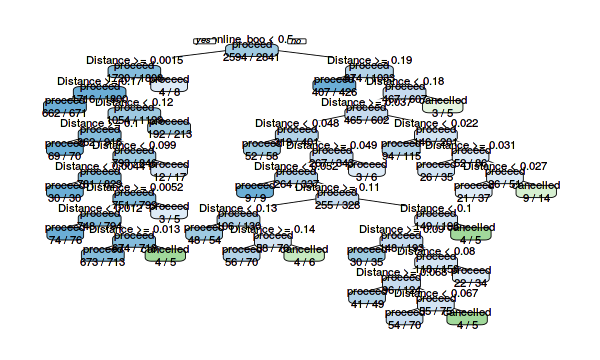

In [24]:
rpart.plot(tree_model,
           fallen.leaves = FALSE, 
           type  = 1, 
           extra = 2, 
           split.font = 1, 
           varlen = -10) 

In [16]:
treePred.class <- predict(tree_model, data = train.df, type = "class")
#head(treePred.class)
treePred.class

1         2         3         4         5         6         7         8 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed cancelled 
       10        11        12        14        15        16        17        18 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       19        20        21        22        25        27        28        29 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       31        32        33        34        35        36        37        38 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       39        40        41        42        43        44        45        46 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       47        49        50        51        52        53        54        55 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       56        57        58        59        60        64        65        66 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       67        68        69        70        71        72        73        75 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       76        77        80        81        82        83        85        87 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       88        89        90        91        92        93        94        95 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
       96        97        99       100       101       102       105       106 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      107       108       110       111       112       113       114       115 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      116       117       118       119       120       121       122       123 
  proceed   proceed   proceed   proceed cancelled   proceed   proceed   proceed 
      124       125       126       127       128       130       131       132 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      133       134       135       136       138       139       141       142 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      143       144       145       148       149       150       151       152 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      153       156       157       158       159       160       161       164 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      165       166       167       169       171       172       174       175 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      176       177       178       180       181       182       183       184 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      185       186       188       190       191       193       194       195 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      196       197       198       199       200       201       202       204 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      205       207       208       210       212       214       215       216 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      217       218       219       221       222       225       226       227 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      228       230       231       232       233       234       235       238 
  proceed   proceed   proceed   proceed   proceed   proceed   proceed   proceed 
      239       240       241       243       247       248       250       252 
  proceed   proceed   proceed   proceed

In [17]:
treePred.score <- predict(tree_model, data = train.df, type = "prob")
#head(treePred.score)
treePred.score

,proceed,cancelled
1,0.9438990,0.05610098
2,0.9438990,0.05610098
3,0.9553991,0.04460094
4,0.9736842,0.02631579
5,0.9438990,0.05610098
6,0.9865872,0.01341282
7,0.9857143,0.01428571
8,0.3571429,0.64285714
10,0.9736842,0.02631579
11,0.9736842,0.02631579


In [18]:
cancelledScore <- treePred.score[,2]
#head(cancelledScore)
cancelledScore

1          2          3          4          5          6          7 
0.05610098 0.05610098 0.04460094 0.02631579 0.05610098 0.01341282 0.01428571 
         8         10         11         12         14         15         16 
0.64285714 0.02631579 0.02631579 0.43243243 0.01341282 0.01341282 0.05610098 
        17         18         19         20         21         22         25 
0.16326531 0.01341282 0.20000000 0.05610098 0.05610098 0.01341282 0.16326531 
        27         28         29         31         32         33         34 
0.01341282 0.05610098 0.29411765 0.01428571 0.04460094 0.04460094 0.18260870 
        35         36         37         38         39         40         41 
0.01341282 0.05610098 0.01341282 0.05610098 0.01341282 0.01341282 0.01341282 
        42         43         44         45         46         47         49 
0.22857143 0.11111111 0.01341282 0.05610098 0.05610098 0.05610098 0.01341282 
        50         51         52         53         54         55         56 
0.04460094 0.04460094 0.14285714 0.09859155 0.01341282 0.09859155 0.01341282 
        57         58         59         60         64         65         66 
0.01341282 0.05610098 0.05610098 0.04460094 0.05610098 0.05610098 0.01341282 
        67         68         69         70         71         72         73 
0.05610098 0.01428571 0.05610098 0.05610098 0.25714286 0.01341282 0.04460094 
        75         76         77         80         81         82         83 
0.04460094 0.20000000 0.05610098 0.04460094 0.11111111 0.05610098 0.05610098 
        85         87         88         89         90         91         92 
0.01341282 0.22857143 0.01341282 0.05610098 0.04460094 0.09859155 0.05610098 
        93         94         95         96         97         99        100 
0.10344828 0.05610098 0.01341282 0.05610098 0.02631579 0.01341282 0.01341282 
       101        102        105        106        107        108        110 
0.05610098 0.01341282 0.05610098 0.01341282 0.01341282 0.05610098 0.04460094 
       111        112        113        114        115        116        117 
0.01341282 0.05610098 0.04460094 0.05610098 0.10344828 0.01341282 0.29411765 
       118        119        120        121        122        123        124 
0.01341282 0.29411765 0.80000000 0.05610098 0.09859155 0.11111111 0.01341282 
       125        126        127        128        130        131        132 
0.05610098 0.04460094 0.01341282 0.05610098 0.01341282 0.01341282 0.05610098 
       133        134        135        136        138        139        141 
0.04460094 0.05610098 0.01341282 0.01341282 0.01341282 0.18260870 0.09859155 
       142        143        144        145        148        149        150 
0.18260870 0.01341282 0.05610098 0.22857143 0.02631579 0.05610098 0.01341282 
       151        152        153        156        157        158        159 
0.04460094 0.01341282 0.05610098 0.05610098 0.05610098 0.01428571 0.01341282 
       160        161        164        165        166        167        169 
0.09859155 0.01428571 0.04460094 0.01341282 0.01341282 0.05610098 0.01341282 
       171        172        174        175        176        177        178 
0.01341282 0.05610098 0.04460094 0.01341282 0.09859155 0.18260870 0.05610098 
       180        181        182        183        184        185        186 
0.09859155 0.01341282 0.16326531 0.10344828 0.20000000 0.05610098 0.04460094 
       188        190        191        193        194        195        196 
0.01341282 0.05610098 0.01341282 0.01341282 0.04460094 0.14285714 0.01341282 
       197        198        199        200        201        202        204 
0.01341282 0.04460094 0.05610098 0.04460094 0.01341282 0.14285714 0.01341282 
       205        207        208        210        212        214        215 
0.01428571 0.04460094 0.05610098 0.04460094 0.04460094 0.05610098 0.25714286 
       216        217        218        219        221        222        225 
0.01428571 0.01341282 0.0134128

modnames,dsids,curvetypes,aucs
m1,1,ROC,0.7979673


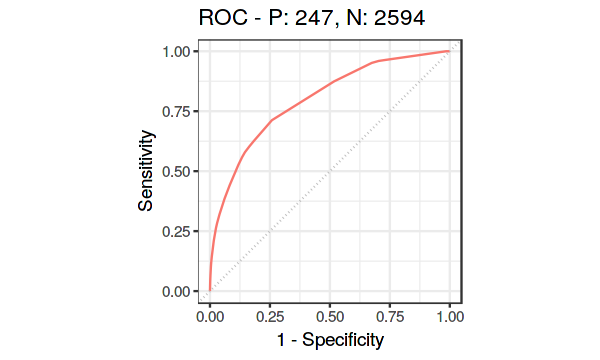

In [19]:
sscurves <- evalmod(scores = cancelledScore, labels = taxi.df$Car_Cancellation)
autoplot(sscurves, "ROC")
auc(sscurves) %>% filter(curvetypes=='ROC')

In [20]:
confusionMatrix(taxi.df$Car_Cancellation,factor( ifelse(cancelledScore > 0.3, "cancelled", "proceed") ),positive = 'cancelled')

Warning message in confusionMatrix.default(taxi.df$Car_Cancellation, factor(ifelse(cancelledScore > :
“Levels are not in the same order for reference and data. Refactoring data to match.”

Confusion Matrix and Statistics

           Reference
Prediction  cancelled proceed
  cancelled        65     182
  proceed          65    2529
                                          
               Accuracy : 0.9131          
                 95% CI : (0.9021, 0.9232)
    No Information Rate : 0.9542          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.303           
 Mcnemar's Test P-Value : 1.572e-13       
                                          
            Sensitivity : 0.50000         
            Specificity : 0.93287         
         Pos Pred Value : 0.26316         
         Neg Pred Value : 0.97494         
             Prevalence : 0.04576         
         Detection Rate : 0.02288         
   Detection Prevalence : 0.08694         
      Balanced Accuracy : 0.71643         
                                          
       'Positive' Class : cancelled       
                                       

In [26]:
a.df <- data.frame(cancelledScore,taxi.df$Car_Cancellation)
a.df %>% arrange(desc(cancelledScore)) %>% mutate(id=1:2841)

cancelledScore,taxi.df.Car_Cancellation,id
0.8000000,proceed,1
0.8000000,proceed,2
0.8000000,cancelled,3
0.8000000,cancelled,4
0.8000000,cancelled,5
0.8000000,cancelled,6
0.8000000,cancelled,7
0.8000000,cancelled,8
0.8000000,cancelled,9
0.8000000,cancelled,10


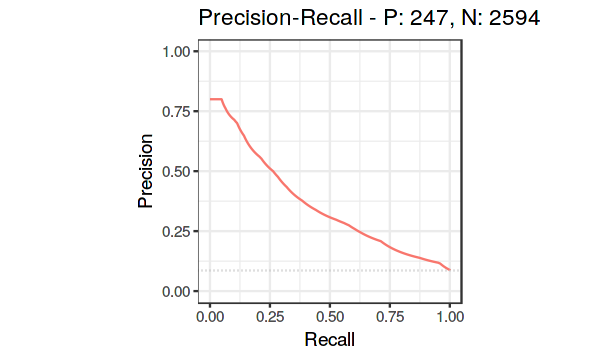

In [27]:
autoplot(sscurves, "PRC")

In [ ]:
# use lm() to run a linear regression of Price on all 11 predictors in the
# training set.
# use . after ~ to include all the remaining columns in train.df as predictors.
taxi.lm <- lm(Car_Cancellation ~ ., data = train.df)
#  use options() to ensure numbers are not displayed in scientific notation.
options(scipen = 999)
summary(taxi.lm)

In [ ]:
library(forecast)
# use predict() to make predictions on a new set.
taxi.lm.pred <- predict(taxi.lm, valid.df)
options(scipen=999, digits = 0)
some.residuals <- valid.df$Car_Cancellation[1:20] - taxi.lm.pred[1:20]
data.frame("Predicted" = taxi.lm.pred[1:20], "Actual" = valid.df$Car_Cancellation[1:20],
    "Residual" = some.residuals)
options(scipen=999, digits = 3)
# use accuracy() to compute common accuracy measures.
accuracy(taxi.lm.pred, valid.df$Car_Cancellation)

In [ ]:
taxi.lm.pred <- predict(taxi.lm, valid.df)
residuals <- valid.df$Car_Cancellation - taxi.lm.pred
residuals.df <- data.frame(residuals)
ggplot(data=residuals.df,
      aes(x=residuals)) +
        geom_histogram()

In [ ]:
install.packages("reprex",lib='.', verbose=TRUE)
library(reprex,lib.loc='.')